# Study about Neural Networks - Network

# 1. Introduction and problem design

This jupyter notebook intends to be as simpler as possible for people understand what neural networks really is.

This is the step two for students lerning networks.

This notebook have 2 neurons in the main layer and 1 neuron in the hidden layer with a custom activate function to plot the categorization.

# 2. Import of libraries

In [1]:
import numpy as np
from sklearn import datasets as d
from sklearn import model_selection as ms

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import backend

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

In [2]:
def custom_activation(x):
    '''
    This function returns the linear function with a clip
    to select the data in two categories (0,1).
    '''
    return keras.backend.clip(keras.activations.linear(x),0,1.1)

# 3. Generation of dataset using numpy and sklearn

In [3]:
space = 0.2
X = np.append(
        d.make_circles(n_samples=1000, noise=0.8, factor=.9)[0] + np.array([2,2]),
        d.make_circles(n_samples=1000, noise=0.8, factor=.9)[0] + np.array([-2,2]),
        axis = 0)
X = np.append(X,
        d.make_circles(n_samples=1000, noise=0.8, factor=.9)[0] + np.array([2,-2]),
        axis=0)
X = np.append(X,
        d.make_circles(n_samples=1000, noise=0.8, factor=.9)[0] + np.array([-2,-2]),
        axis=0)
y = []
for point in X:
    if point[0] > 0  and point[1] > 0:
        y.append(1)
    else:
        y.append(0)
y = np.array(y)

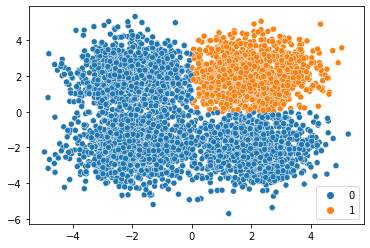

In [4]:
sns.scatterplot(X[:,0], X[:,1], hue=y);

# 3. Neural network modelling

![Illustration of Network](img/neural_network_illustration.png "Illustration of Network")

In [5]:
# Splitting the dataset in trainning and validation
x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
# Creating the simple linear neuron
model = Sequential()
model.add(Dense(2, activation='tanh', input_dim=2))
model.add(Dense(1, activation=custom_activation))

# Hinge loss function was best model for this problem, uncomment the others to test
model.compile(loss='Hinge')
# model.compile(loss='mean_squared_error')
# model.compile(loss='BinaryCrossentropy')
# model.compile(loss='MeanSquaredLogarithmicError')
# model.compile(loss='MeanAbsolutePercentageError')

model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 0.9671 - val_loss: 0.9470
Epoch 2/100
100/100 [==============================] - 0s 530us/step - loss: 0.9423 - val_loss: 0.9140
Epoch 3/100
100/100 [==============================] - 0s 475us/step - loss: 0.9100 - val_loss: 0.8763
Epoch 4/100
100/100 [==============================] - 0s 490us/step - loss: 0.8745 - val_loss: 0.8451
Epoch 5/100
100/100 [==============================] - 0s 495us/step - loss: 0.8450 - val_loss: 0.8208
Epoch 6/100
100/100 [==============================] - 0s 531us/step - loss: 0.8226 - val_loss: 0.8042
Epoch 7/100
100/100 [==============================] - 0s 502us/step - loss: 0.8059 - val_loss: 0.7925
Epoch 8/100
100/100 [==============================] - 0s 511us/step - loss: 0.7945 - val_loss: 0.7848
Epoch 9/100
100/100 [==============================] - 0s 503us/step - loss: 0.7865 - val_loss: 0.7795
Epoch 10/100
100/100 [==============================] - 0s 494us/step - los

Epoch 80/100
100/100 [==============================] - 0s 498us/step - loss: 0.7531 - val_loss: 0.7522
Epoch 81/100
100/100 [==============================] - 0s 492us/step - loss: 0.7531 - val_loss: 0.7521
Epoch 82/100
100/100 [==============================] - 0s 487us/step - loss: 0.7531 - val_loss: 0.7520
Epoch 83/100
100/100 [==============================] - 0s 519us/step - loss: 0.7531 - val_loss: 0.7519
Epoch 84/100
100/100 [==============================] - 0s 509us/step - loss: 0.7530 - val_loss: 0.7520
Epoch 85/100
100/100 [==============================] - 0s 485us/step - loss: 0.7530 - val_loss: 0.7520
Epoch 86/100
100/100 [==============================] - 0s 477us/step - loss: 0.7530 - val_loss: 0.7519
Epoch 87/100
100/100 [==============================] - 0s 509us/step - loss: 0.7530 - val_loss: 0.7518
Epoch 88/100
100/100 [==============================] - 0s 485us/step - loss: 0.7529 - val_loss: 0.7518
Epoch 89/100
100/100 [==============================] - 0s 504us

# 4. Exploring the weights of the neuron

In [7]:
#Test points
pto_test_x = 3
pto_test_y = 5

In [8]:
# Prediction of a point with the help of model
model.predict(np.array([[pto_test_x,pto_test_y]]))

array([[1.1]], dtype=float32)

In [9]:
# Calculating the prediction with the weight of the linear neuron

a = np.tanh(
    pto_test_x * model.layers[0].get_weights()[0][0][0] +\
    pto_test_y * model.layers[0].get_weights()[0][1][0] +\
    model.layers[0].get_weights()[1][0]
    )

b = np.tanh(
    pto_test_x * model.layers[0].get_weights()[0][0][1] +\
    pto_test_y * model.layers[0].get_weights()[0][1][1] +\
    model.layers[0].get_weights()[1][1]
    )

c = np.clip(
    a * model.layers[1].get_weights()[0][0][0] +\
    b * model.layers[1].get_weights()[0][1][0] +\
    model.layers[1].get_weights()[1][0],
    0,1.1)
c

1.1

# 5. Plotting the line of the linear neuron

Text(0.5, 1.0, 'Hyerplan seprating two categories')

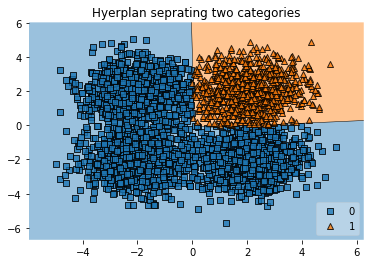

In [10]:
plot_decision_regions(x_train, y_train, clf=model, legend=4)

plt.title('Hyerplan seprating two categories')

# 6. Conclusion

This notebook implemented a more complex neural network to help students.

Three neurons were neede in order to separate the data in two categories.